# Regresión lineal (múltiples variables)

En este caso, vamos a estimar el precio de una vivienda utilizando un conjunto de variables. Utilizaremos la base de datos de viviendas [House Sales in King COunty, USA](https://www.kaggle.com/harlfoxem/housesalesprediction).

In [174]:
# cargamos librerías necesarias
import numpy  as np  
import pandas as pd

import matplotlib.pyplot as plt # para dibujar
%matplotlib inline

In [178]:
# cargamos fichero
house_data = pd.read_csv("./data/house_data.csv") 

# Eliminamos las columnas id y date 
house_data = house_data.drop(['id','date'], axis=1)

# convertir las variables en pies al cuadrado en metros al cuadrado 
feetFeatures = ['sqft_living','sqft_lot','sqft_above','sqft_basement','sqft_living15','sqft_lot15']
house_data[feetFeatures] = house_data[feetFeatures].apply(lambda x: x * 0.3048 * 0.3048)

# renombramos
house_data.columns = ['price','bedrooms','bathrooms','sqm_living','sqm_lot','floors','waterfront','view','condition',
                      'grade','sqm_above','sqm_basement','yr_built','yr_renovated','zip_code','lat','long',
                      'sqm_living15','sqm_lot15']

In [180]:
house_data.head(10)

,price,bedrooms,bathrooms,sqm_living,sqm_lot,floors,waterfront,view,condition,grade,sqm_above,sqm_basement,yr_built,yr_renovated,zip_code,lat,long,sqm_living15,sqm_lot15
0,221900.0,3,1.00,109.625587,524.902176,1.0,0,0,3,7,109.625587,0.000000,1955,0,98178,47.5112,-122.257,124.490074,524.902176
1,538000.0,3,2.25,238.760813,672.803816,2.0,0,0,3,7,201.599597,37.161216,1951,1991,98125,47.7210,-122.319,157.006138,709.686323
2,180000.0,2,1.00,71.535341,929.030400,1.0,0,0,3,6,71.535341,0.000000,1933,0,98028,47.7379,-122.233,252.696269,748.984308
3,604000.0,4,3.00,182.089958,464.515200,1.0,0,0,5,7,97.548192,84.541766,1965,0,98136,47.5208,-122.393,126.348134,464.515200
4,510000.0,3,2.00,156.077107,750.656563,1.0,0,0,3,8,156.077107,0.000000,1987,0,98074,47.6168,-122.045,167.225472,697.051509
5,1225000.0,4,4.50,503.534477,9469.606867,1.0,0,0,3,11,361.392826,142.141651,2001,0,98053,47.6561,-122.005,442.218470,9469.606867
6,257500.0,3,2.25,159.328714,633.505830,2.0,0,0,3,7,159.328714,0.000000,1995,0,98003,47.3097,-122.327,207.917004,633.505830
7,291850.0,3,1.50,98.477222,902.181421,1.0,0,0,3,7,98.477222,0.000000,1963,0,98198,47.4095,-122.315,153.290016,902.181421
8,229500.0,3,1.00,165.367411,693.985709,1.0,0,0,3,7,97.548192,67.819219,1960,0,98146,47.5123,-122.337,165.367411,753.722364
9,323000.0,3,2.50,175.586746,609.443942,2.0,0,0,3,7,175.586746,0.000000,2003,0,98038,47.3684,-122.031,222.038266,703.276013


## Regresión lineal (varias variables)

Vamos a comenzar utilizando sólo algunas variables que nos parecen de interés:

* *price* (variable target)
* *sqm_living*
* *bedrooms*
* *bathrooms*
* *floors*
* *years* : esta características tenemos que calcularla, y se calcularía como $2018 - $ *yr_built*
* *zip_code*

In [181]:
house_data['years'] = 2018 - house_data['yr_built']

myFeatures = ['price','sqm_living','bedrooms','bathrooms','floors','years','zip_code']

# convertimos el DataFrame al formato necesario para scikit-learn
data = house_data[myFeatures].as_matrix() 

y = data[:,0:1] # nos quedamos con la 1ª columna, price
X = data[:,1:]  # nos quedamos con el resto 

### Escalado

Vamos estandarizar (escalar) las variables. Para ello, utilizaremos el módulo de preprocesado de scikit-learn. 

In [183]:
from sklearn import preprocessing

scaler = preprocessing.StandardScaler().fit(X)
Xs = scaler.transform(X)

In [189]:
Xs

array([[-0.96746588, -0.4259767 , -1.39489287, -0.85633928,  0.4443123 ,
         1.86228577],
       [ 0.54346759, -0.4259767 ,  0.2322765 ,  1.11336553,  0.58671   ,
         0.883712  ],
       [-1.4131369 , -1.54297443, -1.39489287, -0.85633928,  1.22749963,
        -0.90726264],
       ...,
       [-0.25004423, -1.54297443, -0.74402512, -0.85633928,  0.37311346,
         1.08681222],
       [-0.77180543, -0.4259767 , -1.39489287, -0.85633928, -0.12527848,
        -0.09486177],
       [ 0.01083637,  0.69102103, -1.39489287, -0.85633928,  0.94270424,
         0.73600275]])

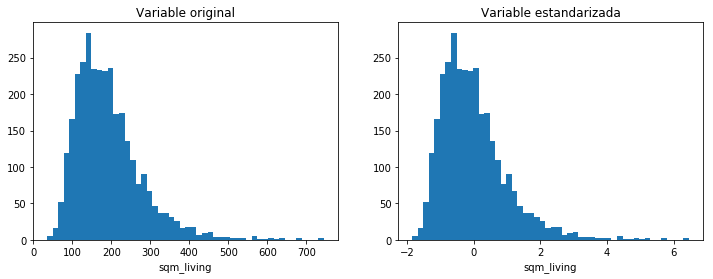

In [184]:
# Comprobamos resultado de la estandarización 
plt.figure(figsize=(12, 4))

plt.subplot(1, 2, 1)
plt.hist(X[:,0],bins=50)
plt.xlabel('sqm_living')
plt.title('Variable original')

plt.subplot(1, 2, 2)
plt.hist(Xs[:,0],bins=50)
plt.xlabel('sqm_living')
plt.title('Variable estandarizada')
plt.show()

### Entrenamiento 

In [185]:
# 1. Cargamos librería y creamos objeto lr
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

# 2. Entrenamos el modelo
lr.fit(Xs,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

Como resultado del entrenamiento, hemos obtenido los coeficientes del modelo: $\omega_0$ y $\omega_1$

In [187]:
w0 = lr.intercept_
w1 = lr.coef_

print ('Intercepto: w0 = %.2f' % w0)
print ('Coeficientes:  w1 = ', w1[0])

Intercepto: w0 = 535418.29
Coeficientes:  w1 =  [291291.72836837 -68437.10645509  51731.93770161  16868.88551202
  96281.59942842   1303.83610837]


Bien, ¿cómo de bueno ha sido el ajuste? Tenemos dos opciones:

- Representar el resultado: en este caso, no podemos representar el precio con respecto a todas las dimensiones (número de características) del problema, porque supondría hacer una representación en 6 dimensiones, y como mucho el ojo humano sólo llega a 3!
- Proporcionar alguna métrica de *performance*: utilizaremos el **error cuadrático medio** (MSE, del inglés *Mean Squared Error*):

$$\textrm{MSE} = \frac{1}{N}\sum_{i=1}^{N}\left(\mathbf{y}^{(i)}-f_{\omega}(\mathbf{x}^{(i)})\right)^2 = ||\mathbf{y} - \mathbf{X}\boldsymbol{\omega}||_2^2$$

In [192]:
# Comprobar la bondad del ajuste mediante análisis de performance
fw = lr.predict(Xs)
MSE = np.mean( (y-fw)**2 )

print ('MSE = %.3g' % MSE)

MSE = 6.37e+10


## Todas las variables

Utilicemos ahora todas las variables para y veamos qué resultado obtenemos?

In [194]:
data = house_data.as_matrix() 

y = data[:,0:1] # nos quedamos con la 1ª columna, price
Xall = data[:,1:]  # nos quedamos con el resto 

scaler = preprocessing.StandardScaler().fit(Xall)
Xalls = scaler.transform(Xall)
#ERROR HAY QUE LIMPIAR DATOS!!!!!

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').